In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/cxldata/projects/creditcard.csv')

data.head(10)

data.shape

(284807, 31)

In [10]:
data.describe()
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

print(data['Class'].value_counts())

print('Valid Transactions: ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraudulent Transactions: ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


0    284315
1       492
Name: Class, dtype: int64
Valid Transactions:  99.83 % of the dataset
Fraudulent Transactions:  0.17 % of the dataset


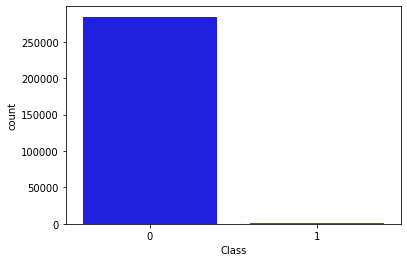

In [15]:
colors = ['blue','red']

sns.countplot('Class', data=data, palette=colors)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)

print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)


Transactions in X_train dataset:  (199364, 30)
Transaction classes in y_train dataset:  (199364, 1)
Transactions in X_test dataset:  (85443, 30)
Transaction classes in y_test dataset:  (85443, 1)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler_amount = StandardScaler()
scaler_time = StandardScaler()

X_train['normAmount'] = scaler_amount.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['normAmount'] = scaler_amount.transform(X_test['Amount'].values.reshape(-1, 1))

X_train['normTime'] = scaler_time.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['normTime'] = scaler_time.transform(X_test['Time'].values.reshape(-1, 1))

X_train = X_train.drop(['Time', 'Amount'], axis=1)
X_test = X_test.drop(['Time', 'Amount'], axis=1)

X_train.head()

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,normTime
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.165692,0.402560
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.352239,0.853047
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.330886,0.646288
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.336067,-1.290102
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.005211,1.060059


In [30]:
from imblearn.over_sampling import SMOTE

print("Before over-sampling\n:", y_train['Class'].value_counts())

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train, y_train['Class'])

print("After over-sampling:\n", y_train_res.value_counts())


Using TensorFlow backend.


Before over-sampling
: 0    199019
1       345
Name: Class, dtype: int64
After over-sampling:
 1    199019
0    199019
Name: Class, dtype: int64


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_curve

parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression()

clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)

k = clf.fit(X_train_res, y_train_res)

print(k.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:   57.1s finished


{'C': 10, 'penalty': 'l2'}


In [44]:
lr_gridcv_best = clf.best_estimator_

y_test_pre = lr_gridcv_best.predict(X_test)

cnf_matrix_test = confusion_matrix(y_test, y_test_pre)

print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))


y_train_pre = lr_gridcv_best.predict(X_train_res)

cnf_matrix_train = confusion_matrix(y_train_res, y_train_pre)

print("Recall metric in the train dataset:", (cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1] )))

Recall metric in the test dataset: 0.9183673469387755
Recall metric in the train dataset: 0.9196961094166889


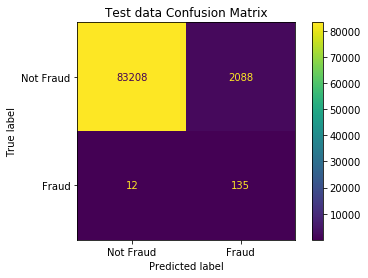

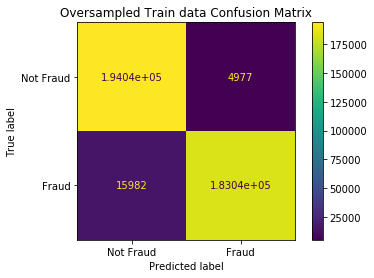

In [50]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['Not Fraud', 'Fraud']

plot_confusion_matrix(k, X_test, y_test,  values_format = '.5g', display_labels=class_names) 
plt.title("Test data Confusion Matrix")
plt.show()

plot_confusion_matrix(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=class_names)
plt.title("Oversampled Train data Confusion Matrix")
plt.show()


ROC-AUC: 0.984022745282694


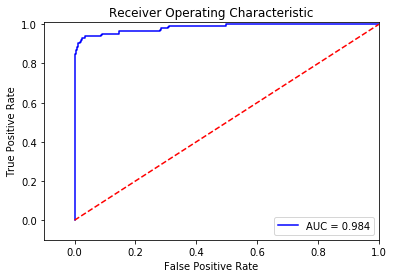

In [53]:
y_k =  k.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_k)

roc_auc = auc(fpr,tpr)

print("ROC-AUC:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()